This script reads the Nc file for Surface Runoff downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

path2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/disch/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=600):
    
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [3]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [4]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package

#from cartopy.feature import ShapelyFeature
#from cartopy.io.shapereader import Reader

In [6]:
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package
sf=shp.Reader('C:/rezaul/1.academic/1.research/1.data/shapeFile/missi/Miss_RiverBasin.shp')

## Basin shape files

In [7]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'


In [8]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)


In [9]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#

In [10]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)


## Read Nc file

In [11]:
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc'
ncFile_precip = str(filePath) + '/' + str(fileName)
print(ncFile_precip)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc


In [12]:
file_precip = Dataset(ncFile_precip, mode='r')
file_precip

lons = file_precip.variables['lon'][:]
lats = file_precip.variables['lat'][:]

In [13]:
print(lats[0:4])
print(lons[0:4])

[-90.         -89.05759162 -88.11518325 -87.17277487]
[0.   1.25 2.5  3.75]


In [14]:
file_xr  = xr.open_dataset(ncFile_precip) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33,
                   time: 120)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 ...
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    PRECT         (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    logname:           sunseon
    host:              mom1
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [15]:
param_precip = file_xr['PRECT']
print(param_precip.shape)
print(param_precip)

(120, 192, 288)
<xarray.DataArray 'PRECT' (time: 120, lat: 192, lon: 288)>
[6635520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean


In [16]:

file_precipHist = Dataset(ncFile_precip, mode='r')
file_precipHist

lons = file_precipHist.variables['lon'][:]
lats = file_precipHist.variables['lat'][:]
times = file_precipHist.variables['time'][:]
ntim = times.shape[0]
print(ntim)

time = np.arange(ntim)
time

param_precipHist = file_precipHist.variables['PRECT'][:]*86400*30*1000    
print(param_precipHist.shape)
print('')


120
(120, 192, 288)



## Setting US boundaries

In [17]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [230 , 300]

In [18]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [19]:
print(latli, latui)
print(lonli, lonui)

122 154
184 240


In [20]:
param_precip_Sample_US = param_precip[:, latli:latui , lonli:lonui]
print(param_precip_Sample_US.shape)

(120, 32, 56)


In [21]:
t,y_US,x_US = param_precip_Sample_US.shape
print(y_US)
print(x_US)
print(t)

32
56
120


In [22]:
lats_US = lats[latli:latui]
print(lats_US)

[24.97382199 25.91623037 26.85863874 27.80104712 28.7434555  29.68586387
 30.62827225 31.57068063 32.51308901 33.45549738 34.39790576 35.34031414
 36.28272251 37.22513089 38.16753927 39.10994764 40.05235602 40.9947644
 41.93717277 42.87958115 43.82198953 44.76439791 45.70680628 46.64921466
 47.59162304 48.53403141 49.47643979 50.41884817 51.36125654 52.30366492
 53.2460733  54.18848168]


In [23]:
lons_US = lons[lonli:lonui]
print(lons_US)

[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data fromGLADE access to NCAR HPC

### Lat Lon info from CESM2

In [24]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [25]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Historical (1850-2014): 1980 months

In [26]:
file_Hist_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsHistEnsMean.npy'
file_Hist_ensMean_loaded = np.load(file_Hist_ensMean)
print(file_Hist_ensMean_loaded.shape)
maxVal = np.nanmax(file_Hist_ensMean_loaded)
maxVal

(1980, 32, 56)


453.8662595041387

### Scenario (2105-2100): 1032 months

In [27]:
file_Scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsScenEnsMean.npy'
file_Scen_ensMean_loaded = np.load(file_Scen_ensMean)
print(file_Scen_ensMean_loaded.shape)
maxVal = np.nanmax(file_Scen_ensMean_loaded)
maxVal

(1032, 32, 56)


520.7679244813335

## The two files (Hist and Scen)

In [28]:
print(file_Hist_ensMean_loaded.shape)
print(file_Scen_ensMean_loaded.shape)

(1980, 32, 56)
(1032, 32, 56)


## The four time slots

In [29]:

histYrSt = 1850

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [30]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [31]:
refPeriodStepSt = (refPeriodYrSt - histYrSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2001
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

1452 1814
362


## Era 1

In [32]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr + 2  # To include Jan and Feb of the following year in 2045
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 362
362


## Era 2

In [33]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2075
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 722
362


## Era 3

In [34]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr # Data ends at Dec, 2100


print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [35]:
print(file_Hist_ensMean_loaded.shape)
print(file_Scen_ensMean_loaded.shape)

(1980, 32, 56)
(1032, 32, 56)


In [36]:
precip_refPeriod_Us_ensmean = file_Hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(precip_refPeriod_Us_ensmean.shape)

(362, 32, 56)


In [37]:
precip_scenEraOne_Us_ensmean = file_Scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(precip_scenEraOne_Us_ensmean.shape)

(362, 32, 56)


In [38]:
precip_scenEraTwo_Us_ensmean = file_Scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(precip_scenEraTwo_Us_ensmean.shape)

(362, 32, 56)


In [39]:
precip_scenEraThree_Us_ensmean = file_Scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(precip_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Seasonal analysis start here

In [40]:
print(nMonsPerYr)

12


In [167]:
precip_refPeriod_Us_ensmean = file_Hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(precip_refPeriod_Us_ensmean.shape)

precip_scenEraOne_Us_ensmean = file_Scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(precip_scenEraOne_Us_ensmean.shape)

precip_scenEraTwo_Us_ensmean = file_Scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(precip_scenEraTwo_Us_ensmean.shape)

precip_scenEraThree_Us_ensmean = file_Scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(precip_scenEraThree_Us_ensmean.shape)

(362, 32, 56)
(362, 32, 56)
(362, 32, 56)
(312, 32, 56)


## MAM

### ref Period

In [42]:
mamMonSt = 3
mamMonMid = 4
mamMonEnd = 5

In [43]:

precip_mamSt_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(precip_mamSt_refPeriod_Us_ensmean.shape)

precip_mamMid_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(precip_mamMid_refPeriod_Us_ensmean.shape)

precip_mamEnd_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(precip_mamEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [44]:
precip_mamSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_mamSt_refPeriod_Us_ensmean, axis = 0)
print(precip_mamSt_refPeriod_Us_ensmean_timeAvg.shape)

precip_mamMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_mamMid_refPeriod_Us_ensmean, axis = 0)
print(precip_mamMid_refPeriod_Us_ensmean_timeAvg.shape)

precip_mamEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_mamEnd_refPeriod_Us_ensmean, axis = 0)
print(precip_mamEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [45]:
precip_mamTot_refPeriod_Us_ensmean_timeAvg = (precip_mamSt_refPeriod_Us_ensmean_timeAvg+precip_mamMid_refPeriod_Us_ensmean_timeAvg+precip_mamEnd_refPeriod_Us_ensmean_timeAvg)/3
print(precip_mamTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


### Scen Era 1

In [46]:

precip_mamSt_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(precip_mamSt_scenEraOne_Us_ensmean.shape)

precip_mamMid_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(precip_mamMid_scenEraOne_Us_ensmean.shape)

precip_mamEnd_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(precip_mamEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [47]:
precip_mamSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_mamSt_scenEraOne_Us_ensmean, axis = 0)
print(precip_mamSt_scenEraOne_Us_ensmean_timeAvg.shape)

precip_mamMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_mamMid_scenEraOne_Us_ensmean, axis = 0)
print(precip_mamMid_scenEraOne_Us_ensmean_timeAvg.shape)

precip_mamEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_mamEnd_scenEraOne_Us_ensmean, axis = 0)
print(precip_mamEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [48]:
precip_mamTot_scenEraOne_Us_ensmean_timeAvg = (precip_mamSt_scenEraOne_Us_ensmean_timeAvg+precip_mamMid_scenEraOne_Us_ensmean_timeAvg+precip_mamEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(precip_mamTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


### Scen Era 2

In [49]:

precip_mamSt_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(precip_mamSt_scenEraTwo_Us_ensmean.shape)

precip_mamMid_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(precip_mamMid_scenEraTwo_Us_ensmean.shape)

precip_mamEnd_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(precip_mamEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [50]:
precip_mamSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_mamSt_scenEraTwo_Us_ensmean, axis = 0)
print(precip_mamSt_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_mamMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_mamMid_scenEraTwo_Us_ensmean, axis = 0)
print(precip_mamMid_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_mamEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_mamEnd_scenEraTwo_Us_ensmean, axis = 0)
print(precip_mamEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [51]:
precip_mamTot_scenEraTwo_Us_ensmean_timeAvg = (precip_mamSt_scenEraTwo_Us_ensmean_timeAvg+precip_mamMid_scenEraTwo_Us_ensmean_timeAvg+precip_mamEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(precip_mamTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


### Scen Era 3

In [52]:

precip_mamSt_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(precip_mamSt_scenEraThree_Us_ensmean.shape)

precip_mamMid_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(precip_mamMid_scenEraThree_Us_ensmean.shape)

precip_mamEnd_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(precip_mamEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [53]:
precip_mamSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_mamSt_scenEraThree_Us_ensmean, axis = 0)
print(precip_mamSt_scenEraThree_Us_ensmean_timeAvg.shape)

precip_mamMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_mamMid_scenEraThree_Us_ensmean, axis = 0)
print(precip_mamMid_scenEraThree_Us_ensmean_timeAvg.shape)

precip_mamEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_mamEnd_scenEraThree_Us_ensmean, axis = 0)
print(precip_mamEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [54]:
precip_mamTot_scenEraThree_Us_ensmean_timeAvg = (precip_mamSt_scenEraThree_Us_ensmean_timeAvg+precip_mamMid_scenEraThree_Us_ensmean_timeAvg+precip_mamEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(precip_mamTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


### Differences at the three Eras

In [55]:
precip_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (precip_mamTot_scenEraOne_Us_ensmean_timeAvg - precip_mamTot_refPeriod_Us_ensmean_timeAvg)
print(precip_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [56]:
precip_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (precip_mamTot_scenEraTwo_Us_ensmean_timeAvg - precip_mamTot_refPeriod_Us_ensmean_timeAvg)
print(precip_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [57]:
precip_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (precip_mamTot_scenEraThree_Us_ensmean_timeAvg - precip_mamTot_refPeriod_Us_ensmean_timeAvg)
print(precip_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (MAM)

### Writing in an Xarray Data array

In [58]:

y_Us, x_Us = precip_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape
print(y_Us)
print(x_Us)


32
56


In [59]:

precip_mamTot_scenEraOne_diff_Us_xarray = xr.DataArray(precip_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(precip_mamTot_scenEraOne_diff_Us_xarray.shape)
print(precip_mamTot_scenEraOne_diff_Us_xarray)


(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-2.64144757, -2.47965695, -2.3859869 , ...,  3.92271191,
         3.62198185,  3.25799746],
       [-2.40502036, -2.26552387, -2.13339955, ...,  3.97963582,
         3.8172467 ,  3.62333003],
       [-2.4494681 , -2.21849948, -2.03011586, ...,  4.06151817,
         4.00955157,  4.02817965],
       ...,
       [ 0.2730927 , -0.3078048 , -1.1514183 , ...,  4.37111262,
         4.52181737,  4.39429089],
       [ 0.13517569, -0.45364364, -0.00964412, ...,  4.42415091,
         4.07282487,  3.55923943],
       [ 0.81799015,  0.66582799,  1.25195404, ...,  4.081432  ,
         3.60077224,  2.86877901]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [60]:

precip_mamTot_scenEraTwo_diff_Us_xarray = xr.DataArray(precip_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(precip_mamTot_scenEraTwo_diff_Us_xarray.shape)
print(precip_mamTot_scenEraTwo_diff_Us_xarray)


(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-4.08283443, -3.73352197, -3.4893147 , ...,  6.23761711,
         5.18910577,  4.0610999 ],
       [-3.69476005, -3.27920572, -3.02131222, ...,  7.0242233 ,
         6.30601124,  5.45897644],
       [-3.30096354, -2.90107179, -2.63729979, ...,  7.79240736,
         6.99129534,  6.36254789],
       ...,
       [ 3.56274505,  1.96040719, -0.6200226 , ...,  8.26897396,
         7.95291107,  7.63933001],
       [ 4.28308224,  1.72560143,  1.52256213, ...,  8.11635153,
         7.16454004,  6.52227527],
       [ 4.27734099,  3.38172552,  3.5280829 , ...,  7.5157029 ,
         6.08790311,  4.39358493]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [61]:

precip_mamTot_scenEraThree_diff_Us_xarray = xr.DataArray(precip_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(precip_mamTot_scenEraThree_diff_Us_xarray.shape)
print(precip_mamTot_scenEraThree_diff_Us_xarray)


(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-6.59777066, -6.27922556, -6.12495599, ...,  9.32635098,
         8.26468439,  7.22449133],
       [-5.79030323, -5.28885227, -5.07159669, ..., 10.91897393,
         9.67794808,  8.77207849],
       [-4.99575425, -4.53297857, -4.22180718, ..., 12.38974627,
        11.06748185, 10.05041317],
       ...,
       [ 6.51238192,  4.84325007,  1.12208334, ..., 14.52490391,
        13.73817203, 13.10743222],
       [ 6.82915281,  3.64952701,  4.24961723, ..., 13.91917092,
        12.77348529, 11.73669449],
       [ 5.98740903,  5.96439403,  6.72872375, ..., 12.67991562,
        11.10837098,  9.04605413]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Mask files for the Basin Domain only

### Mississippi

In [62]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [63]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [64]:
precip_mamTot_scenEraOne_diff_masked_Missi = precip_mamTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_mamTot_scenEraOne_diff_masked_Missi.shape)
print(precip_mamTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [65]:
precip_mamTot_scenEraTwo_diff_masked_Missi = precip_mamTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_mamTot_scenEraTwo_diff_masked_Missi.shape)
print(precip_mamTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [66]:
precip_mamTot_scenEraThree_diff_masked_Missi = precip_mamTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_mamTot_scenEraThree_diff_masked_Missi.shape)
print(precip_mamTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [67]:
print(precip_mamTot_scenEraOne_diff_masked_Missi.shape)

(32, 56)


## Find max and min values

In [68]:
maxVal_mamTot_diff_masked_scenEraOne = np.nanmax(precip_mamTot_scenEraOne_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraOne)
minVal_mamTot_diff_masked_scenEraOne = np.nanmin(precip_mamTot_scenEraOne_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraOne)

6.881706766677098
0.09550978347405703


In [69]:
maxVal_mamTot_diff_masked_scenEraTwo = np.nanmax(precip_mamTot_scenEraTwo_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraTwo)
minVal_mamTot_diff_masked_scenEraTwo = np.nanmin(precip_mamTot_scenEraTwo_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraTwo)

14.866151000150666
4.213711167828663


In [70]:
maxVal_mamTot_diff_masked_scenEraThree = np.nanmax(precip_mamTot_scenEraThree_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraThree)
minVal_mamTot_diff_masked_scenEraThree = np.nanmin(precip_mamTot_scenEraThree_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraThree)

23.780965973578247
1.18957107139056


## Plotting

In [71]:

latUsMin = lats_US.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = lats_US.max()
print(latUsMax)

lonUsMin = lons_US.min()
print(lonUsMin)

lonUsMax = lons_US.max()
print(lonUsMax)

24.973821989528794
54.18848167539267
230.0
298.75


In [72]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973821989528794, 54.18848167539267]


In [73]:
x_Us = linspace(lonUsMin, lonUsMax, x_US)
y_Us = linspace(latUsMin, latUsMax, y_US)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382199 25.91623037 26.85863874 27.80104712 28.7434555  29.68586387
 30.62827225 31.57068063 32.51308901 33.45549738 34.39790576 35.34031414
 36.28272251 37.22513089 38.16753927 39.10994764 40.05235602 40.9947644
 41.93717277 42.87958115 43.82198953 44.76439791 45.70680628 46.64921466
 47.59162304 48.53403141 49.47643979 50.41884817 51.36125654 52.30366492
 53.2460733  54.18848168]


In [74]:
vmin_mamTot_scenEraOne = np.floor(minVal_mamTot_diff_masked_scenEraOne)
vmax_mamTot_scenEraOne = np.ceil(maxVal_mamTot_diff_masked_scenEraOne)
print(vmin_mamTot_scenEraOne)
print(vmax_mamTot_scenEraOne)

0.0
7.0


In [75]:
vmin_mamTot_scenEraTwo = np.floor(minVal_mamTot_diff_masked_scenEraTwo)
vmax_mamTot_scenEraTwo = np.ceil(maxVal_mamTot_diff_masked_scenEraTwo)
print(vmin_mamTot_scenEraTwo)
print(vmax_mamTot_scenEraTwo)

4.0
15.0


In [76]:
vmin_mamTot_scenEraThree = np.floor(minVal_mamTot_diff_masked_scenEraThree)
vmax_mamTot_scenEraThree = np.ceil(maxVal_mamTot_diff_masked_scenEraThree)
print(vmin_mamTot_scenEraThree)
print(vmax_mamTot_scenEraThree)

1.0
24.0


In [77]:
nDiv_mamTot_scenEraOne = int(vmax_mamTot_scenEraOne - vmin_mamTot_scenEraOne + 1)
print(nDiv_mamTot_scenEraOne)

8


In [78]:
nDiv_mamTot_scenEraTwo = int(vmax_mamTot_scenEraTwo - vmin_mamTot_scenEraTwo + 1)
print(nDiv_mamTot_scenEraTwo)

12


In [79]:
nDiv_mamTot_scenEraThree = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_mamTot_scenEraThree)

24


## JJA

## ref Period

In [80]:
jjaMonSt = 6
jjaMonMid = 7
jjaMonEnd = 8

In [81]:

precip_jjaSt_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(precip_jjaSt_refPeriod_Us_ensmean.shape)

precip_jjaMid_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(precip_jjaMid_refPeriod_Us_ensmean.shape)

precip_jjaEnd_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(precip_jjaEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [82]:
precip_jjaSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_jjaSt_refPeriod_Us_ensmean, axis = 0)
print(precip_jjaSt_refPeriod_Us_ensmean_timeAvg.shape)

precip_jjaMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_jjaMid_refPeriod_Us_ensmean, axis = 0)
print(precip_jjaMid_refPeriod_Us_ensmean_timeAvg.shape)

precip_jjaEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_jjaEnd_refPeriod_Us_ensmean, axis = 0)
print(precip_jjaEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [83]:
precip_jjaTot_refPeriod_Us_ensmean_timeAvg = (precip_jjaSt_refPeriod_Us_ensmean_timeAvg+precip_jjaMid_refPeriod_Us_ensmean_timeAvg+precip_jjaEnd_refPeriod_Us_ensmean_timeAvg)/3
print(precip_jjaTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [84]:

precip_jjaSt_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(precip_jjaSt_scenEraOne_Us_ensmean.shape)

precip_jjaMid_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(precip_jjaMid_scenEraOne_Us_ensmean.shape)

precip_jjaEnd_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(precip_jjaEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [85]:
precip_jjaSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_jjaSt_scenEraOne_Us_ensmean, axis = 0)
print(precip_jjaSt_scenEraOne_Us_ensmean_timeAvg.shape)

precip_jjaMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_jjaMid_scenEraOne_Us_ensmean, axis = 0)
print(precip_jjaMid_scenEraOne_Us_ensmean_timeAvg.shape)

precip_jjaEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_jjaEnd_scenEraOne_Us_ensmean, axis = 0)
print(precip_jjaEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [86]:
precip_jjaTot_scenEraOne_Us_ensmean_timeAvg = (precip_jjaSt_scenEraOne_Us_ensmean_timeAvg+precip_jjaMid_scenEraOne_Us_ensmean_timeAvg+precip_jjaEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(precip_jjaTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [87]:

precip_jjaSt_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(precip_jjaSt_scenEraTwo_Us_ensmean.shape)

precip_jjaMid_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(precip_jjaMid_scenEraTwo_Us_ensmean.shape)

precip_jjaEnd_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(precip_jjaEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [88]:
precip_jjaSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_jjaSt_scenEraTwo_Us_ensmean, axis = 0)
print(precip_jjaSt_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_jjaMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_jjaMid_scenEraTwo_Us_ensmean, axis = 0)
print(precip_jjaMid_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_jjaEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_jjaEnd_scenEraTwo_Us_ensmean, axis = 0)
print(precip_jjaEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [89]:
precip_jjaTot_scenEraTwo_Us_ensmean_timeAvg = (precip_jjaSt_scenEraTwo_Us_ensmean_timeAvg+precip_jjaMid_scenEraTwo_Us_ensmean_timeAvg+precip_jjaEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(precip_jjaTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [90]:

precip_jjaSt_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(precip_jjaSt_scenEraThree_Us_ensmean.shape)

precip_jjaMid_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(precip_jjaMid_scenEraThree_Us_ensmean.shape)

precip_jjaEnd_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(precip_jjaEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [91]:
precip_jjaSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_jjaSt_scenEraThree_Us_ensmean, axis = 0)
print(precip_jjaSt_scenEraThree_Us_ensmean_timeAvg.shape)

precip_jjaMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_jjaMid_scenEraThree_Us_ensmean, axis = 0)
print(precip_jjaMid_scenEraThree_Us_ensmean_timeAvg.shape)

precip_jjaEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_jjaEnd_scenEraThree_Us_ensmean, axis = 0)
print(precip_jjaEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [92]:
precip_jjaTot_scenEraThree_Us_ensmean_timeAvg = (precip_jjaSt_scenEraThree_Us_ensmean_timeAvg+precip_jjaMid_scenEraThree_Us_ensmean_timeAvg+precip_jjaEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(precip_jjaTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [93]:
precip_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (precip_jjaTot_scenEraOne_Us_ensmean_timeAvg - precip_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(precip_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [94]:
precip_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (precip_jjaTot_scenEraTwo_Us_ensmean_timeAvg - precip_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(precip_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [95]:
precip_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (precip_jjaTot_scenEraThree_Us_ensmean_timeAvg - precip_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(precip_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (JJA) =========

## Writing in an Xarray Data array as a sample

In [96]:
precip_jjaTot_scenEraOne_diff_Us_xarray = xr.DataArray(precip_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(precip_jjaTot_scenEraOne_diff_Us_xarray.shape)
print(precip_jjaTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.28233857,   0.29117652,   0.28726012, ...,  -5.20634675,
         -4.95556802,  -4.69731743],
       [  0.22342455,   0.31189434,   0.31659824, ...,  -4.84551025,
         -4.30508885,  -4.06622943],
       [  0.19926126,   0.30704591,   0.33691254, ...,  -4.54436961,
         -4.1922746 ,  -3.95510066],
       ...,
       [ -6.15453253,  -9.31218328, -11.70890253, ...,   2.52946303,
          2.70431595,   3.10205244],
       [ -8.21205104, -11.01140266,  -8.86000048, ...,   3.47268774,
          3.75415095,   4.12932825],
       [ -9.03182828,  -8.72518298,  -5.78006425, ...,   3.6006796 ,
          3.76172383,   3.59207043]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [97]:
precip_jjaTot_scenEraTwo_diff_Us_xarray = xr.DataArray(precip_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(precip_jjaTot_scenEraTwo_diff_Us_xarray.shape)
print(precip_jjaTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.94184148,   0.77019525,   0.60362273, ...,  -9.36573623,
         -8.82129434,  -8.29124683],
       [  0.94702678,   0.81810571,   0.64658034, ...,  -8.62175036,
         -7.91908151,  -7.37979659],
       [  1.03794713,   0.83510146,   0.78819292, ...,  -7.72521819,
         -7.23809081,  -6.69950481],
       ...,
       [-11.43764494, -17.3724888 , -19.57655458, ...,   4.47077214,
          4.71750759,   5.22602072],
       [-16.54425155, -20.67872419, -14.73227855, ...,   5.24266116,
          5.81043024,   6.49809237],
       [-19.01346196, -15.92791699,  -9.14285763, ...,   4.57163184,
          5.30139548,   5.73270075]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [98]:
precip_jjaTot_scenEraThree_diff_Us_xarray = xr.DataArray(precip_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(precip_jjaTot_scenEraThree_diff_Us_xarray.shape)
print(precip_jjaTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  1.444397  ,   1.16206938,   0.88220967, ..., -12.85175785,
        -12.31118982, -11.61418307],
       [  1.35508497,   1.17158285,   0.88299451, ..., -11.44863326,
        -10.54882118,  -9.71554435],
       [  1.38335711,   1.11866152,   0.90123846, ..., -10.12180144,
         -9.12282615,  -8.22440248],
       ...,
       [-15.69032467, -23.82590118, -26.0726538 , ...,   8.15989092,
          9.82437967,  10.68345492],
       [-23.33782661, -28.48875197, -19.34693113, ...,   8.47526211,
         10.26809384,  11.89203205],
       [-26.78038428, -21.60667809, -11.02490338, ...,   6.64023271,
          7.8579443 ,   9.55285402]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Creating Mask files for the Basin Domain only

## Mississippi

In [99]:
precip_jjaTot_scenEraOne_diff_masked_Missi = precip_jjaTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_jjaTot_scenEraOne_diff_masked_Missi.shape)
print(precip_jjaTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [100]:
precip_jjaTot_scenEraTwo_diff_masked_Missi = precip_jjaTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_jjaTot_scenEraTwo_diff_masked_Missi.shape)
print(precip_jjaTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [101]:
precip_jjaTot_scenEraThree_diff_masked_Missi = precip_jjaTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_jjaTot_scenEraThree_diff_masked_Missi.shape)
print(precip_jjaTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [102]:
maxVal_jjaTot_diff_masked_scenEraOne = np.nanmax(precip_jjaTot_scenEraOne_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraOne)
minVal_jjaTot_diff_masked_scenEraOne = np.nanmin(precip_jjaTot_scenEraOne_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraOne)

5.832193981982314
-7.523572972878867


In [103]:
maxVal_jjaTot_diff_masked_scenEraTwo = np.nanmax(precip_jjaTot_scenEraTwo_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraTwo)
minVal_jjaTot_diff_masked_scenEraTwo = np.nanmin(precip_jjaTot_scenEraTwo_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraTwo)

9.01338112051063
-11.541243301801181


In [104]:
maxVal_jjaTot_diff_masked_scenEraThree = np.nanmax(precip_jjaTot_scenEraThree_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraThree)
minVal_jjaTot_diff_masked_scenEraThree = np.nanmin(precip_jjaTot_scenEraThree_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraThree)

13.670011144466201
-16.794562979413


In [105]:
vmin_jjaTot_scenEraThree = np.floor(minVal_jjaTot_diff_masked_scenEraThree)
vmax_jjaTot_scenEraThree = np.ceil(maxVal_jjaTot_diff_masked_scenEraThree)
print(vmin_jjaTot_scenEraThree)
print(vmax_jjaTot_scenEraThree)

-17.0
14.0


In [106]:
nDiv_jjaTot_scenEraThree = int(vmax_jjaTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_jjaTot_scenEraThree)

32


## SON

## ref Period

In [107]:
sonMonSt = 9
sonMonMid = 10
sonMonEnd = 11

In [108]:

precip_sonSt_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(precip_sonSt_refPeriod_Us_ensmean.shape)

precip_sonMid_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(precip_sonMid_refPeriod_Us_ensmean.shape)

precip_sonEnd_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(precip_sonEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [109]:
precip_sonSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_sonSt_refPeriod_Us_ensmean, axis = 0)
print(precip_sonSt_refPeriod_Us_ensmean_timeAvg.shape)

precip_sonMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_sonMid_refPeriod_Us_ensmean, axis = 0)
print(precip_sonMid_refPeriod_Us_ensmean_timeAvg.shape)

precip_sonEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_sonEnd_refPeriod_Us_ensmean, axis = 0)
print(precip_sonEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [110]:
precip_sonTot_refPeriod_Us_ensmean_timeAvg = (precip_sonSt_refPeriod_Us_ensmean_timeAvg+precip_sonMid_refPeriod_Us_ensmean_timeAvg+precip_sonEnd_refPeriod_Us_ensmean_timeAvg)/3
print(precip_sonTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [111]:

precip_sonSt_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(precip_sonSt_scenEraOne_Us_ensmean.shape)

precip_sonMid_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(precip_sonMid_scenEraOne_Us_ensmean.shape)

precip_sonEnd_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(precip_sonEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [112]:
precip_sonSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_sonSt_scenEraOne_Us_ensmean, axis = 0)
print(precip_sonSt_scenEraOne_Us_ensmean_timeAvg.shape)

precip_sonMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_sonMid_scenEraOne_Us_ensmean, axis = 0)
print(precip_sonMid_scenEraOne_Us_ensmean_timeAvg.shape)

precip_sonEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_sonEnd_scenEraOne_Us_ensmean, axis = 0)
print(precip_sonEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [113]:
precip_sonTot_scenEraOne_Us_ensmean_timeAvg = (precip_sonSt_scenEraOne_Us_ensmean_timeAvg+precip_sonMid_scenEraOne_Us_ensmean_timeAvg+precip_sonEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(precip_sonTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [114]:

precip_sonSt_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(precip_sonSt_scenEraTwo_Us_ensmean.shape)

precip_sonMid_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(precip_sonMid_scenEraTwo_Us_ensmean.shape)

precip_sonEnd_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(precip_sonEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [115]:
precip_sonSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_sonSt_scenEraTwo_Us_ensmean, axis = 0)
print(precip_sonSt_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_sonMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_sonMid_scenEraTwo_Us_ensmean, axis = 0)
print(precip_sonMid_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_sonEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_sonEnd_scenEraTwo_Us_ensmean, axis = 0)
print(precip_sonEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [116]:
precip_sonTot_scenEraTwo_Us_ensmean_timeAvg = (precip_sonSt_scenEraTwo_Us_ensmean_timeAvg+precip_sonMid_scenEraTwo_Us_ensmean_timeAvg+precip_sonEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(precip_sonTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [117]:

precip_sonSt_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(precip_sonSt_scenEraThree_Us_ensmean.shape)

precip_sonMid_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(precip_sonMid_scenEraThree_Us_ensmean.shape)

precip_sonEnd_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(precip_sonEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [118]:
precip_sonSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_sonSt_scenEraThree_Us_ensmean, axis = 0)
print(precip_sonSt_scenEraThree_Us_ensmean_timeAvg.shape)

precip_sonMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_sonMid_scenEraThree_Us_ensmean, axis = 0)
print(precip_sonMid_scenEraThree_Us_ensmean_timeAvg.shape)

precip_sonEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_sonEnd_scenEraThree_Us_ensmean, axis = 0)
print(precip_sonEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [119]:
precip_sonTot_scenEraThree_Us_ensmean_timeAvg = (precip_sonSt_scenEraThree_Us_ensmean_timeAvg+precip_sonMid_scenEraThree_Us_ensmean_timeAvg+precip_sonEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(precip_sonTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Percent Differences at the three Eras

In [120]:
precip_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (precip_sonTot_scenEraOne_Us_ensmean_timeAvg - precip_sonTot_refPeriod_Us_ensmean_timeAvg)
print(precip_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [121]:
precip_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (precip_sonTot_scenEraTwo_Us_ensmean_timeAvg - precip_sonTot_refPeriod_Us_ensmean_timeAvg)
print(precip_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [122]:
precip_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (precip_sonTot_scenEraThree_Us_ensmean_timeAvg - precip_sonTot_refPeriod_Us_ensmean_timeAvg)
print(precip_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (SON) =========

## Writing in an Xarray Data array

In [123]:
precip_sonTot_scenEraOne_diff_Us_xarray = xr.DataArray(precip_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(precip_sonTot_scenEraOne_diff_Us_xarray.shape)
print(precip_sonTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.18765439,  0.44751993,  0.52156149, ...,  1.33142713,
         0.52552119, -0.71671759],
       [ 0.07767708,  0.23780145,  0.39916196, ...,  2.58546717,
         1.78734594,  1.17486679],
       [ 0.0359642 ,  0.10968126,  0.33968389, ...,  4.15579062,
         3.33773502,  2.56926194],
       ...,
       [ 9.73353772, 13.76180718, 10.28717879, ...,  4.60305821,
         4.40695564,  4.26343629],
       [13.23996041, 12.78063274,  8.61021051, ...,  5.65399005,
         5.10263764,  4.46698252],
       [13.31437072, 10.17710352,  7.06982588, ...,  6.49582007,
         5.43340642,  4.14773267]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [124]:
precip_sonTot_scenEraTwo_diff_Us_xarray = xr.DataArray(precip_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(precip_sonTot_scenEraTwo_diff_Us_xarray.shape)
print(precip_sonTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 3.39039692,  3.62423125,  3.74208237, ...,  0.54085319,
        -0.87871726, -3.2464915 ],
       [ 2.64080143,  2.92321522,  3.06031051, ...,  4.11352202,
         2.28707109,  0.18352127],
       [ 2.17124731,  2.33239217,  2.54398854, ...,  7.46118178,
         5.35963637,  3.21765509],
       ...,
       [27.58868239, 37.38093538, 30.02243075, ...,  7.77726864,
         8.68917998,  9.06203466],
       [36.6464136 , 36.06117179, 24.09055436, ...,  8.23479912,
         8.75032771,  8.96497266],
       [35.87198145, 27.26013681, 18.34043837, ...,  8.83152589,
         8.02635414,  7.89394577]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [125]:
precip_sonTot_scenEraThree_diff_Us_xarray = xr.DataArray(precip_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(precip_sonTot_scenEraThree_diff_Us_xarray.shape)
print(precip_sonTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  7.67197943,   7.30187041,   6.98872004, ...,  -3.92259242,
         -6.56392406, -10.042118  ],
       [  6.83508645,   6.65900272,   6.58890411, ...,   1.65405865,
         -1.10614738,  -4.15123106],
       [  6.03456234,   6.06315012,   6.21062532, ...,   6.51503665,
          3.68632286,   1.31603937],
       ...,
       [ 47.23485063,  61.05664406,  47.05553362, ...,  12.99220826,
         14.04954026,  14.84643127],
       [ 60.99370216,  59.82805485,  37.50872049, ...,  12.70995607,
         13.46973118,  14.00997735],
       [ 58.56267729,  44.38622128,  28.88476295, ...,  12.86836238,
         12.25732724,  12.35829001]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Creating Mask files for the Basin Domain only

## Mississippi

In [126]:
precip_sonTot_scenEraOne_diff_masked_Missi = precip_sonTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_sonTot_scenEraOne_diff_masked_Missi.shape)
print(precip_sonTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [127]:
precip_sonTot_scenEraTwo_diff_masked_Missi = precip_sonTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_sonTot_scenEraTwo_diff_masked_Missi.shape)
print(precip_sonTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [128]:
precip_sonTot_scenEraThree_diff_masked_Missi = precip_sonTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_sonTot_scenEraThree_diff_masked_Missi.shape)
print(precip_sonTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [129]:
maxVal_sonTot_diff_masked_scenEraOne = np.nanmax(precip_sonTot_scenEraOne_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraOne)
minVal_sonTot_diff_masked_scenEraOne = np.nanmin(precip_sonTot_scenEraOne_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraOne)

8.019193532927432
-2.383178267581968


In [130]:
maxVal_sonTot_diff_masked_scenEraTwo = np.nanmax(precip_sonTot_scenEraTwo_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraTwo)
minVal_sonTot_diff_masked_scenEraTwo = np.nanmin(precip_sonTot_scenEraTwo_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraTwo)

12.8634965478156
-3.420519592159714


In [131]:
maxVal_sonTot_diff_masked_scenEraThree = np.nanmax(precip_sonTot_scenEraThree_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraThree)
minVal_sonTot_diff_masked_scenEraThree = np.nanmin(precip_sonTot_scenEraThree_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraThree)

16.9709902933011
-2.0712532391547924


In [132]:
vmin_sonTot_scenEraThree = np.floor(minVal_sonTot_diff_masked_scenEraThree)
vmax_sonTot_scenEraThree = np.ceil(maxVal_sonTot_diff_masked_scenEraThree)
print(vmin_sonTot_scenEraThree)
print(vmax_sonTot_scenEraThree)

-3.0
17.0


In [133]:
nDiv_sonTot_scenEraThree = int(vmax_sonTot_scenEraThree - vmin_sonTot_scenEraThree + 1)
print(nDiv_sonTot_scenEraThree)

21


## DJF

## ref Period

In [134]:
djfMonSt = 12
djfMonMid = 1
djfMonEnd = 2

In [135]:

precip_djfSt_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(precip_djfSt_refPeriod_Us_ensmean.shape)

precip_djfMid_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[djfMonMid-1::nMonsPerYr]
precip_djfMid_refPeriod_Us_ensmean = precip_djfMid_refPeriod_Us_ensmean[1::]
print(precip_djfMid_refPeriod_Us_ensmean.shape)

precip_djfEnd_refPeriod_Us_ensmean = precip_refPeriod_Us_ensmean[djfMonEnd-1::nMonsPerYr]
precip_djfEnd_refPeriod_Us_ensmean = precip_djfEnd_refPeriod_Us_ensmean[1::]
print(precip_djfEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [136]:
precip_djfSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_djfSt_refPeriod_Us_ensmean, axis = 0)
print(precip_djfSt_refPeriod_Us_ensmean_timeAvg.shape)

precip_djfMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_djfMid_refPeriod_Us_ensmean, axis = 0)
print(precip_djfMid_refPeriod_Us_ensmean_timeAvg.shape)

precip_djfEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(precip_djfEnd_refPeriod_Us_ensmean, axis = 0)
print(precip_djfEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [137]:
precip_djfTot_refPeriod_Us_ensmean_timeAvg = (precip_djfSt_refPeriod_Us_ensmean_timeAvg+precip_djfMid_refPeriod_Us_ensmean_timeAvg+precip_djfEnd_refPeriod_Us_ensmean_timeAvg)/3
print(precip_djfTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [138]:

precip_djfSt_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(precip_djfSt_scenEraOne_Us_ensmean.shape)

precip_djfMid_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[djfMonMid-1::nMonsPerYr]
precip_djfMid_scenEraOne_Us_ensmean = precip_djfMid_scenEraOne_Us_ensmean[1::]
print(precip_djfMid_scenEraOne_Us_ensmean.shape)

precip_djfEnd_scenEraOne_Us_ensmean = precip_scenEraOne_Us_ensmean[djfMonEnd-1::nMonsPerYr]
precip_djfEnd_scenEraOne_Us_ensmean = precip_djfEnd_scenEraOne_Us_ensmean[1::]
print(precip_djfEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [139]:
precip_djfSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_djfSt_scenEraOne_Us_ensmean, axis = 0)
print(precip_djfSt_scenEraOne_Us_ensmean_timeAvg.shape)

precip_djfMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_djfMid_scenEraOne_Us_ensmean, axis = 0)
print(precip_djfMid_scenEraOne_Us_ensmean_timeAvg.shape)

precip_djfEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(precip_djfEnd_scenEraOne_Us_ensmean, axis = 0)
print(precip_djfEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [140]:
precip_djfTot_scenEraOne_Us_ensmean_timeAvg = (precip_djfSt_scenEraOne_Us_ensmean_timeAvg+precip_djfMid_scenEraOne_Us_ensmean_timeAvg+precip_djfEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(precip_djfTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [141]:

precip_djfSt_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(precip_djfSt_scenEraTwo_Us_ensmean.shape)

precip_djfMid_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[djfMonMid-1::nMonsPerYr]
precip_djfMid_scenEraTwo_Us_ensmean = precip_djfMid_scenEraTwo_Us_ensmean[1::]
print(precip_djfMid_scenEraTwo_Us_ensmean.shape)

precip_djfEnd_scenEraTwo_Us_ensmean = precip_scenEraTwo_Us_ensmean[djfMonEnd-1::nMonsPerYr]
precip_djfEnd_scenEraTwo_Us_ensmean = precip_djfEnd_scenEraTwo_Us_ensmean[1::]
print(precip_djfEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [142]:
precip_djfSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_djfSt_scenEraTwo_Us_ensmean, axis = 0)
print(precip_djfSt_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_djfMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_djfMid_scenEraTwo_Us_ensmean, axis = 0)
print(precip_djfMid_scenEraTwo_Us_ensmean_timeAvg.shape)

precip_djfEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(precip_djfEnd_scenEraTwo_Us_ensmean, axis = 0)
print(precip_djfEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [143]:
precip_djfTot_scenEraTwo_Us_ensmean_timeAvg = (precip_djfSt_scenEraTwo_Us_ensmean_timeAvg+precip_djfMid_scenEraTwo_Us_ensmean_timeAvg+precip_djfEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(precip_djfTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [144]:

precip_djfSt_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(precip_djfSt_scenEraThree_Us_ensmean.shape)

precip_djfMid_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[djfMonMid-1::nMonsPerYr]
print(precip_djfMid_scenEraThree_Us_ensmean.shape)

precip_djfEnd_scenEraThree_Us_ensmean = precip_scenEraThree_Us_ensmean[djfMonEnd-1::nMonsPerYr]
print(precip_djfEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [145]:
precip_djfSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_djfSt_scenEraThree_Us_ensmean, axis = 0)
print(precip_djfSt_scenEraThree_Us_ensmean_timeAvg.shape)

precip_djfMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_djfMid_scenEraThree_Us_ensmean, axis = 0)
print(precip_djfMid_scenEraThree_Us_ensmean_timeAvg.shape)

precip_djfEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(precip_djfEnd_scenEraThree_Us_ensmean, axis = 0)
print(precip_djfEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [146]:
precip_djfTot_scenEraThree_Us_ensmean_timeAvg = (precip_djfSt_scenEraThree_Us_ensmean_timeAvg+precip_djfMid_scenEraThree_Us_ensmean_timeAvg+precip_djfEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(precip_djfTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Percent Differences at the three Eras

In [147]:
precip_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (precip_djfTot_scenEraOne_Us_ensmean_timeAvg - precip_djfTot_refPeriod_Us_ensmean_timeAvg)
print(precip_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [148]:
precip_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (precip_djfTot_scenEraTwo_Us_ensmean_timeAvg - precip_djfTot_refPeriod_Us_ensmean_timeAvg)
print(precip_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [149]:
precip_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (precip_djfTot_scenEraThree_Us_ensmean_timeAvg - precip_djfTot_refPeriod_Us_ensmean_timeAvg)
print(precip_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (DJF) =========

## Writing in an Xarray Data array

In [150]:
precip_djfTot_scenEraOne_diff_Us_xarray = xr.DataArray(precip_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(precip_djfTot_scenEraOne_diff_Us_xarray.shape)
print(precip_djfTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-0.11204094,  0.22286557,  0.43365239, ...,  3.52679014,
         3.36729661,  3.23600449],
       [-0.10709779,  0.21328709,  0.6102653 , ...,  4.0302206 ,
         3.93490394,  3.73801846],
       [-0.42746569, -0.0321057 ,  0.32279397, ...,  4.55507479,
         4.57689578,  4.53367601],
       ...,
       [ 8.07379391,  8.95888277,  4.86326982, ...,  7.06690228,
         7.20338064,  7.1090138 ],
       [ 7.37327977,  3.64631551,  2.85958089, ...,  6.25010365,
         6.28821789,  6.02752474],
       [ 3.2034768 ,  2.44468307,  2.5163667 , ...,  5.80460196,
         5.55677607,  5.03314922]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [151]:
precip_djfTot_scenEraTwo_diff_Us_xarray = xr.DataArray(precip_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(precip_djfTot_scenEraTwo_diff_Us_xarray.shape)
print(precip_djfTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-1.89898371, -2.0187266 , -1.97084965, ...,  9.65642156,
         8.5839172 ,  7.32983754],
       [-0.8382012 , -1.10164486, -0.98791518, ..., 11.40364437,
        10.59381341,  9.3496499 ],
       [-0.0804824 , -0.2377294 , -0.32827644, ..., 12.70415616,
        12.01441491, 11.14378065],
       ...,
       [22.64208359, 22.62863836, 11.90442206, ..., 10.93050964,
        10.93044059, 10.99466343],
       [22.88465013, 13.63107657,  8.51225335, ...,  9.31604188,
         9.08673295,  8.97434213],
       [13.49503807,  9.536648  ,  7.25424122, ...,  8.33145301,
         7.52680826,  6.67706478]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [152]:
precip_djfTot_scenEraThree_diff_Us_xarray = xr.DataArray(precip_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(precip_djfTot_scenEraThree_diff_Us_xarray.shape)
print(precip_djfTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-0.54559403, -1.00354512, -1.30247392, ..., 17.62578016,
        15.68551687, 13.49099826],
       [ 0.90150793,  0.40992859,  0.05100404, ..., 21.06520576,
        19.68551634, 17.63767433],
       [ 2.3349937 ,  1.91694344,  1.42776213, ..., 23.32763437,
        22.60998873, 21.23886246],
       ...,
       [34.28920991, 33.76185688, 14.95528552, ..., 17.53600866,
        17.3504017 , 17.34599657],
       [35.89652771, 20.76555638, 10.92427897, ..., 15.05804963,
        14.79582594, 14.47234992],
       [22.14711539, 13.37238047, 10.02252472, ..., 14.07038113,
        12.91385669, 11.73026708]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Creating Mask files for the Basin Domain only

## Mississippi

In [153]:
precip_djfTot_scenEraOne_diff_masked_Missi = precip_djfTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_djfTot_scenEraOne_diff_masked_Missi.shape)
print(precip_djfTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [154]:
precip_djfTot_scenEraTwo_diff_masked_Missi = precip_djfTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_djfTot_scenEraTwo_diff_masked_Missi.shape)
print(precip_djfTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [155]:
precip_djfTot_scenEraThree_diff_masked_Missi = precip_djfTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(precip_djfTot_scenEraThree_diff_masked_Missi.shape)
print(precip_djfTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [156]:
maxVal_djfTot_diff_masked_scenEraOne = np.nanmax(precip_djfTot_scenEraOne_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraOne)
minVal_djfTot_diff_masked_scenEraOne = np.nanmin(precip_djfTot_scenEraOne_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraOne)

10.798155120269826
0.4196323987752848


In [157]:
maxVal_djfTot_diff_masked_scenEraTwo = np.nanmax(precip_djfTot_scenEraTwo_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraTwo)
minVal_djfTot_diff_masked_scenEraTwo = np.nanmin(precip_djfTot_scenEraTwo_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraTwo)

19.164690616644734
0.6926919271677008


In [158]:
maxVal_djfTot_diff_masked_scenEraThree = np.nanmax(precip_djfTot_scenEraThree_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraThree)
minVal_djfTot_diff_masked_scenEraThree = np.nanmin(precip_djfTot_scenEraThree_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraThree)

29.312858983598048
-2.342948538500856


In [159]:
vmin_djfTot_scenEraThree = np.floor(minVal_djfTot_diff_masked_scenEraThree)
vmax_djfTot_scenEraThree = np.ceil(maxVal_djfTot_diff_masked_scenEraThree)
print(vmin_djfTot_scenEraThree)
print(vmax_djfTot_scenEraThree)

-3.0
30.0


In [160]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_djfTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

34


In [161]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

48


In [162]:
nDiv_seasonMax = int(vmax_sonTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_seasonMax)

35


In [163]:
nDiv_seasonMax = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_seasonMax)

48


In [164]:
print(precip_djfTot_scenEraOne_diff_masked_Missi.shape)

(32, 56)


## Figure Formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-172-9f2c4a67e85a>:96: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
<ipython-input-172-9f2c4a67e85a>:97: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-172-9f2c4a67e85a>:124: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = tickFontSize)
<ipython-input-172-9f2c4a67e85a>:126: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-172-9f2c4a67e85a>:152: MatplotlibDeprecationWarning: Case-insensitive properties 

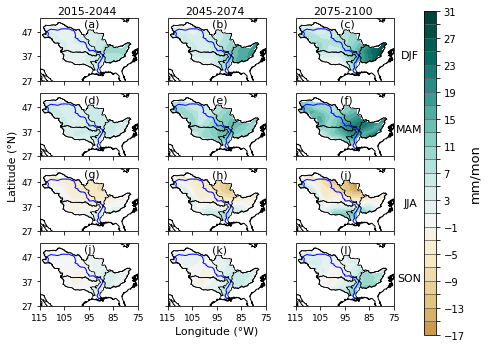

In [172]:

fraction_seasonMax = 1.9
nDiv_seasonMax = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)


tickFontSize = 9
textFontSize = 11
legendFontSize = 10
titleFontSize = 11

cbarTickFontSize = 10
cbarTextFontSize = 13


linewidth = 0.7
#++++++++++++++++++++

#++++++++++++++++++++

# Plot for August
#   https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=vmin_jjaTot_scenEraThree, vmax=vmax_djfTot_scenEraThree+1, midpoint=0)
levels = np.linspace(vmin_jjaTot_scenEraThree, vmax_djfTot_scenEraThree+1, int(nDiv_seasonMax/fraction_seasonMax)) # to draw 11 levels
boundaries=np.linspace(vmin_jjaTot_scenEraThree,vmax_djfTot_scenEraThree+1, int(nDiv_seasonMax/fraction_seasonMax))

latTickLebelsStr = ['27', '37', '47', ]
lonTickLebelsStr = ['115', '105', '95', '85', '75',]

latTicks = [27, 37, 47]
lonTicks = [-115, -105, -95, -85, -75]

yLimLow = 27
yLimHigh = 52.5

xLimLow = -115
xLimHigh = -75
#+++++++++++++++++++++++++++++++++++++++++



fig = plt.figure(figsize=(11, 5), constrained_layout=True)
axs = [plt.subplot(4, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(12)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,precip_djfTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)
                              
plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)
ax1.set_xlim([xLimLow, xLimHigh])
ax1.set_ylim([yLimLow, yLimHigh])

ax1.set_yticks(latTicks) 
ax1.set_xticks(lonTicks) 


ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax1.set_xticklabels('', fontSize = tickFontSize)
ax1.set_ylabel('', fontsize = textFontVal)

ax1.set_title('(a)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
ax1.text(-108.0, 54, r'2015-2044', fontsize=titleFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,precip_djfTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p2 = ax2.get_position().get_points().flatten()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
#ax2.set_xlim([-115, -75])
#ax2.set_ylim([27, 52.5])
ax2.set_xlim([xLimLow, xLimHigh])
ax2.set_ylim([yLimLow, yLimHigh])

ax2.set_yticks(latTicks) 

ax2.set_yticklabels('', fontSize = tickFontSize)
ax2.set_xticks(lonTicks) 
ax2.set_xticklabels('', fontSize = tickFontSize)
ax2.set_title('(b)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
ax2.text(-108.0, 54, r'2045-2074', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,precip_djfTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
#ax3.set_xlim([-115, -75])
#ax3.set_ylim([27, 52.5])
ax3.set_xlim([xLimLow, xLimHigh])
ax3.set_ylim([yLimLow, yLimHigh])

ax3.set_yticks(latTicks) 

ax3.set_yticklabels('', fontSize = tickFontSize)
ax3.set_xticks(lonTicks) 
ax3.set_xticklabels('', fontSize = tickFontSize)
ax3.set_title('(c)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
ax3.text(-108.0, 54, r'2075-2100', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,precip_mamTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)
#ax4.set_xlim([-115, -75])
#ax4.set_ylim([27, 52.5])
ax4.set_xlim([xLimLow, xLimHigh])
ax4.set_ylim([yLimLow, yLimHigh])

ax4.set_yticks(latTicks) 
ax4.set_xticks(lonTicks) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax4.set_xticklabels('', fontSize = tickFontSize)

ax4.set_ylabel('Latitude (°N)', fontsize = textFontSize, y=-0.15)
ax4.set_title('(d)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,precip_mamTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p5 = ax5.get_position().get_points().flatten()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
#ax5.set_xlim([-115, -75])
#ax5.set_ylim([27, 52.5])
ax5.set_xlim([xLimLow, xLimHigh])
ax5.set_ylim([yLimLow, yLimHigh])


ax5.set_yticks(latTicks) 

ax5.set_yticklabels('', fontSize = tickFontSize)
ax5.set_xticks(lonTicks) 
ax5.set_xticklabels('', fontSize = tickFontSize)
ax5.set_title('(e)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,precip_mamTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
#ax6.set_xlim([-115, -75])
#ax6.set_ylim([27, 52.5])
ax6.set_xlim([xLimLow, xLimHigh])
ax6.set_ylim([yLimLow, yLimHigh])

ax6.set_yticks(latTicks) 

ax6.set_yticklabels('', fontSize = tickFontSize)
ax6.set_xticks(lonTicks) 
ax6.set_xticklabels('', fontSize = tickFontSize)
ax6.set_title('(f)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,precip_jjaTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)
#ax7.set_xlim([-115, -75])
#ax7.set_ylim([27, 52.5])
ax7.set_xlim([xLimLow, xLimHigh])
ax7.set_ylim([yLimLow, yLimHigh])

ax7.set_yticks(latTicks) 
ax7.set_xticks(lonTicks) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax7.set_xticklabels('', fontSize = tickFontSize)
ax7.set_title('(g)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,precip_jjaTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p8 = ax8.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
#ax8.set_xlim([-115, -75])
#ax8.set_ylim([27, 52.5])
ax8.set_xlim([xLimLow, xLimHigh])
ax8.set_ylim([yLimLow, yLimHigh])

ax8.set_yticks(latTicks) 
ax8.set_yticklabels('', fontSize = tickFontSize)
ax8.set_xticks(lonTicks) 
ax8.set_xticklabels('', fontSize = tickFontSize)
ax8.set_title('(h)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,precip_jjaTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
#ax9.set_xlim([-115, -75])
#ax9.set_ylim([27, 52.5])
ax9.set_xlim([xLimLow, xLimHigh])
ax9.set_ylim([yLimLow, yLimHigh])

ax9.set_yticks(latTicks) 

ax9.set_yticklabels('', fontSize = tickFontSize)
ax9.set_xticks(lonTicks) 
ax9.set_xticklabels('', fontSize = tickFontSize)
ax9.set_title('(i)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,precip_sonTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)
#ax10.set_xlim([-115, -75])
#ax10.set_ylim([27, 52.5])
ax10.set_xlim([xLimLow, xLimHigh])
ax10.set_ylim([yLimLow, yLimHigh])

ax10.set_yticks(latTicks) 
ax10.set_xticks(lonTicks) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax10.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax10.set_title('(j)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,precip_sonTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p11 = ax11.get_position().get_points().flatten()
cbax11 = fig.add_axes([p11[0]+0.18, +0.02, (p11[2]-p11[0])*0.12, 0.9])

cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries, orientation = 'vertical') 
cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for label in cbar11.ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
    
cbar11.set_label("mm/mon", fontsize = cbarTextFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
#ax11.set_xlim([-115, -75])
#ax11.set_ylim([27, 52.5])
ax11.set_xlim([xLimLow, xLimHigh])
ax11.set_ylim([yLimLow, yLimHigh])


ax11.set_yticks(latTicks) 

ax11.set_yticklabels('', fontSize = tickFontSize)

ax11.set_xticks(lonTicks) 
ax11.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax11.set_xlabel('Longitude (°W)', fontsize = textFontSize)
ax11.set_title('(k)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,precip_sonTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
#ax12.set_xlim([-115, -75])
#ax12.set_ylim([27, 52.5])
ax12.set_xlim([xLimLow, xLimHigh])
ax12.set_ylim([yLimLow, yLimHigh])

ax12.set_yticks(latTicks) 

ax12.set_yticklabels('', fontSize = tickFontSize)
ax12.set_xticks(lonTicks) 

ax12.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax12.set_title('(l)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.text(-105, 24, 'DJF', fontsize=titleFontVal)
plt.text(-123, 13, 'MAM', fontsize=titleFontVal)
plt.text(-96, 2, 'JJA', fontsize=titleFontVal)
plt.text(-119, -9, 'SON', fontsize=titleFontVal)
    
plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\precip\seasonal\tcfPrecipSeasMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\precip\seasonal\tcfPrecipSeasMap.png', dpi=600)  

plt.show()

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [166]:
STOPPING here ========

SyntaxError: invalid syntax (<ipython-input-166-073310598ae4>, line 1)